### 1D Token prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random
import contextlib

#### Data Preparation

**Geometric Brownian Motion Simulator**

$dS_t = \mu S_tdt + \sigma S_tdW_t \\$

$S_0$: Initial Stock price $\\$
$\mu$: Drift coefficient $\\$
$\sigma$: Volatility coefficient $\\$
$W_t$: Wiener Process (Brownian motion)

In [19]:
def gbm_simulator(key, S0, mu, sigma, T, dt):
    # Number of time steps
    N = int(T / dt)
    t = jnp.linspace(0, T, N)
    W = random.normal(key, (N,)) * jnp.sqrt(dt)
    
    # Wiener process
    W = jnp.cumsum(W)
    S = S0 * jnp.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return S

# Parameters for the GBM
S0 = 100.0                  # Initial stock price
mu = 0.1                    # Drift coefficient
sigma = 0.2                 # Volatility coefficient
T = 5.0                     # Total time (year)
dt = 0.005                  # Time step

# Generate random key
key = random.PRNGKey(15)

# Simulate GBM
GBM_data = gbm_simulator(key, S0, mu, sigma, T, dt)

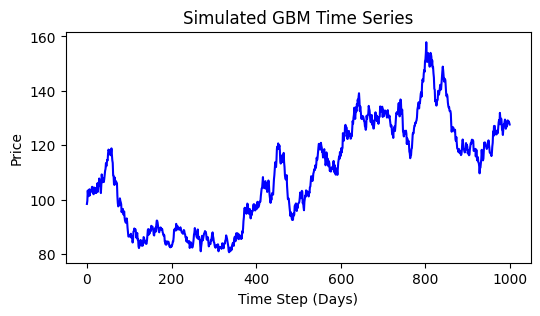

Mean Price: 109.42
Standard Deviation of Price: 18.97

Min Price:  80.71577 Max Price:  157.8785


In [39]:
# Plot the time series
plt.figure(figsize=(6, 3))
plt.plot(GBM_data, color ='blue')
plt.title('Simulated GBM Time Series')
plt.xlabel('Time Step (Days)')
plt.ylabel('Price')
plt.show()

# Calculate and print basic statistics
mean_price = jnp.mean(GBM_data)
std_dev_price = jnp.std(GBM_data)
print(f"Mean Price: {mean_price:.2f}")
print(f"Standard Deviation of Price: {std_dev_price:.2f}")
print('')

print('Min Price: ', min(GBM_data), 'Max Price: ', max(GBM_data))

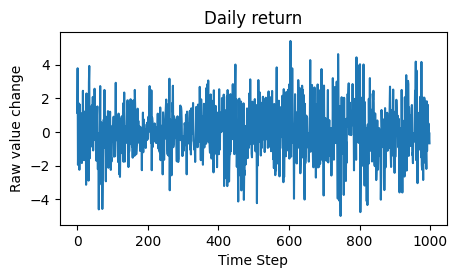

Max negative daily change:  -4.978058 Max positive daily change:  5.396782 Average Change:  0.029212654


In [70]:
GBM_data = np.array(GBM_data)
avg_price_change = []
for i in range(len(GBM_data)-1):
    avg_price_change.append((GBM_data[i+1] - GBM_data[i]))

plt.figure(figsize=(5,2.5))
plt.plot(avg_price_change)
plt.title('Daily return')
plt.xlabel('Time Step')
plt.ylabel('Raw value change')
plt.show()

print('Max negative daily change: ', np.min(avg_price_change), 'Max positive daily change: ', np.max(avg_price_change), 'Average Change: ', np.mean(avg_price_change))

## Make a Boxplot!